In [43]:
# Mengimport library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [44]:
url = 'https://raw.githubusercontent.com/miguelgunawan/dataset-w2-Data-Mining/refs/heads/main/breast-cancer.csv'#memberikan link dataset dari kaggle yang telah diupload di github
df = pd.read_csv(url) #membuat variabel untuk menyimpan dataset
df.head()#menampilkan 5 data teratas dari dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
df.isnull().sum()#pengecekan data null

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [46]:
print(df.info())#menampilkan informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [47]:
df.describe()#menampilkan deskripsi kolom dari dataset

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Identifikasi dan pilih semua kolom kategorikal
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Konversi setiap kolom kategorikal ke numerik
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Menampilkan 10 data pertama
df.head(10)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


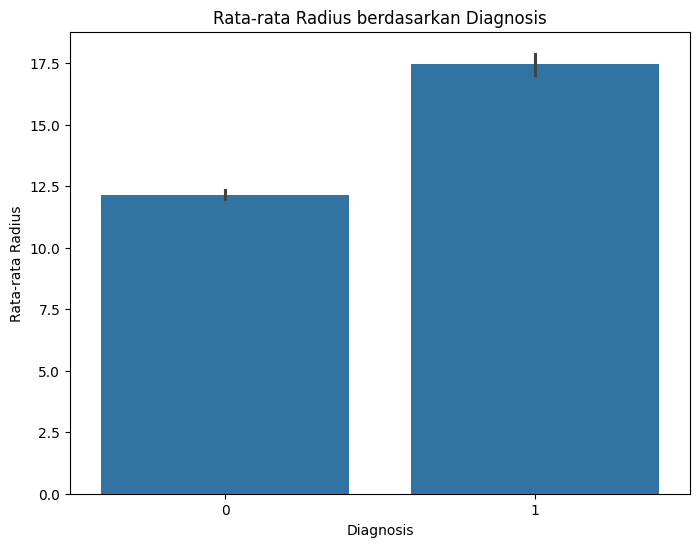

In [49]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='diagnosis', y='radius_mean', estimator='mean')
plt.title('Rata-rata Radius berdasarkan Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Rata-rata Radius')
plt.show()
# bar chart menunjukkan bahwa rata-rata radius untuk kasus malignan (kanker) cenderung lebih besar dibandingkan dengan kasus benign
# grafik ini memberikan gambaran awal yang kuat tentang hubungan antara ukuran tumor (radius) dan sifat tumor (diagnosis), yang dapat berguna untuk penelitian dan praktik klinis.

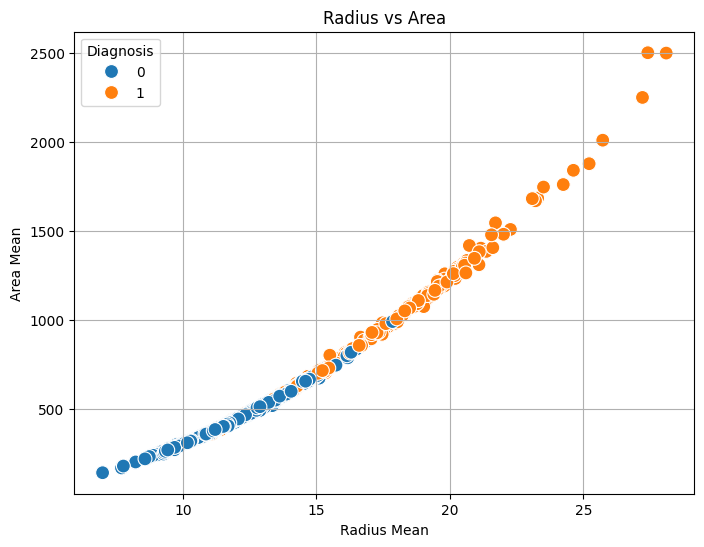

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='radius_mean', y='area_mean', hue='diagnosis', s=100)
plt.title('Radius vs Area')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.legend(title='Diagnosis')
plt.grid(True)
plt.show()
# Adanya korelasi positif antara radius_mean dan area_mean artinya, semakin besar ukuran radius tumor, semakin besar pula area tumor.
# titik yang mewakili tumor malignan terdistribusi di area dengan ukuran radius dan area yang lebih besar dibandingkan dengan tumor benign.
# scatter plot ini mengilustrasikan hubungan yang kuat antara ukuran radius dan area tumor, serta bagaimana ukuran tersebut dapat digunakan untuk membedakan antara jenis tumor.

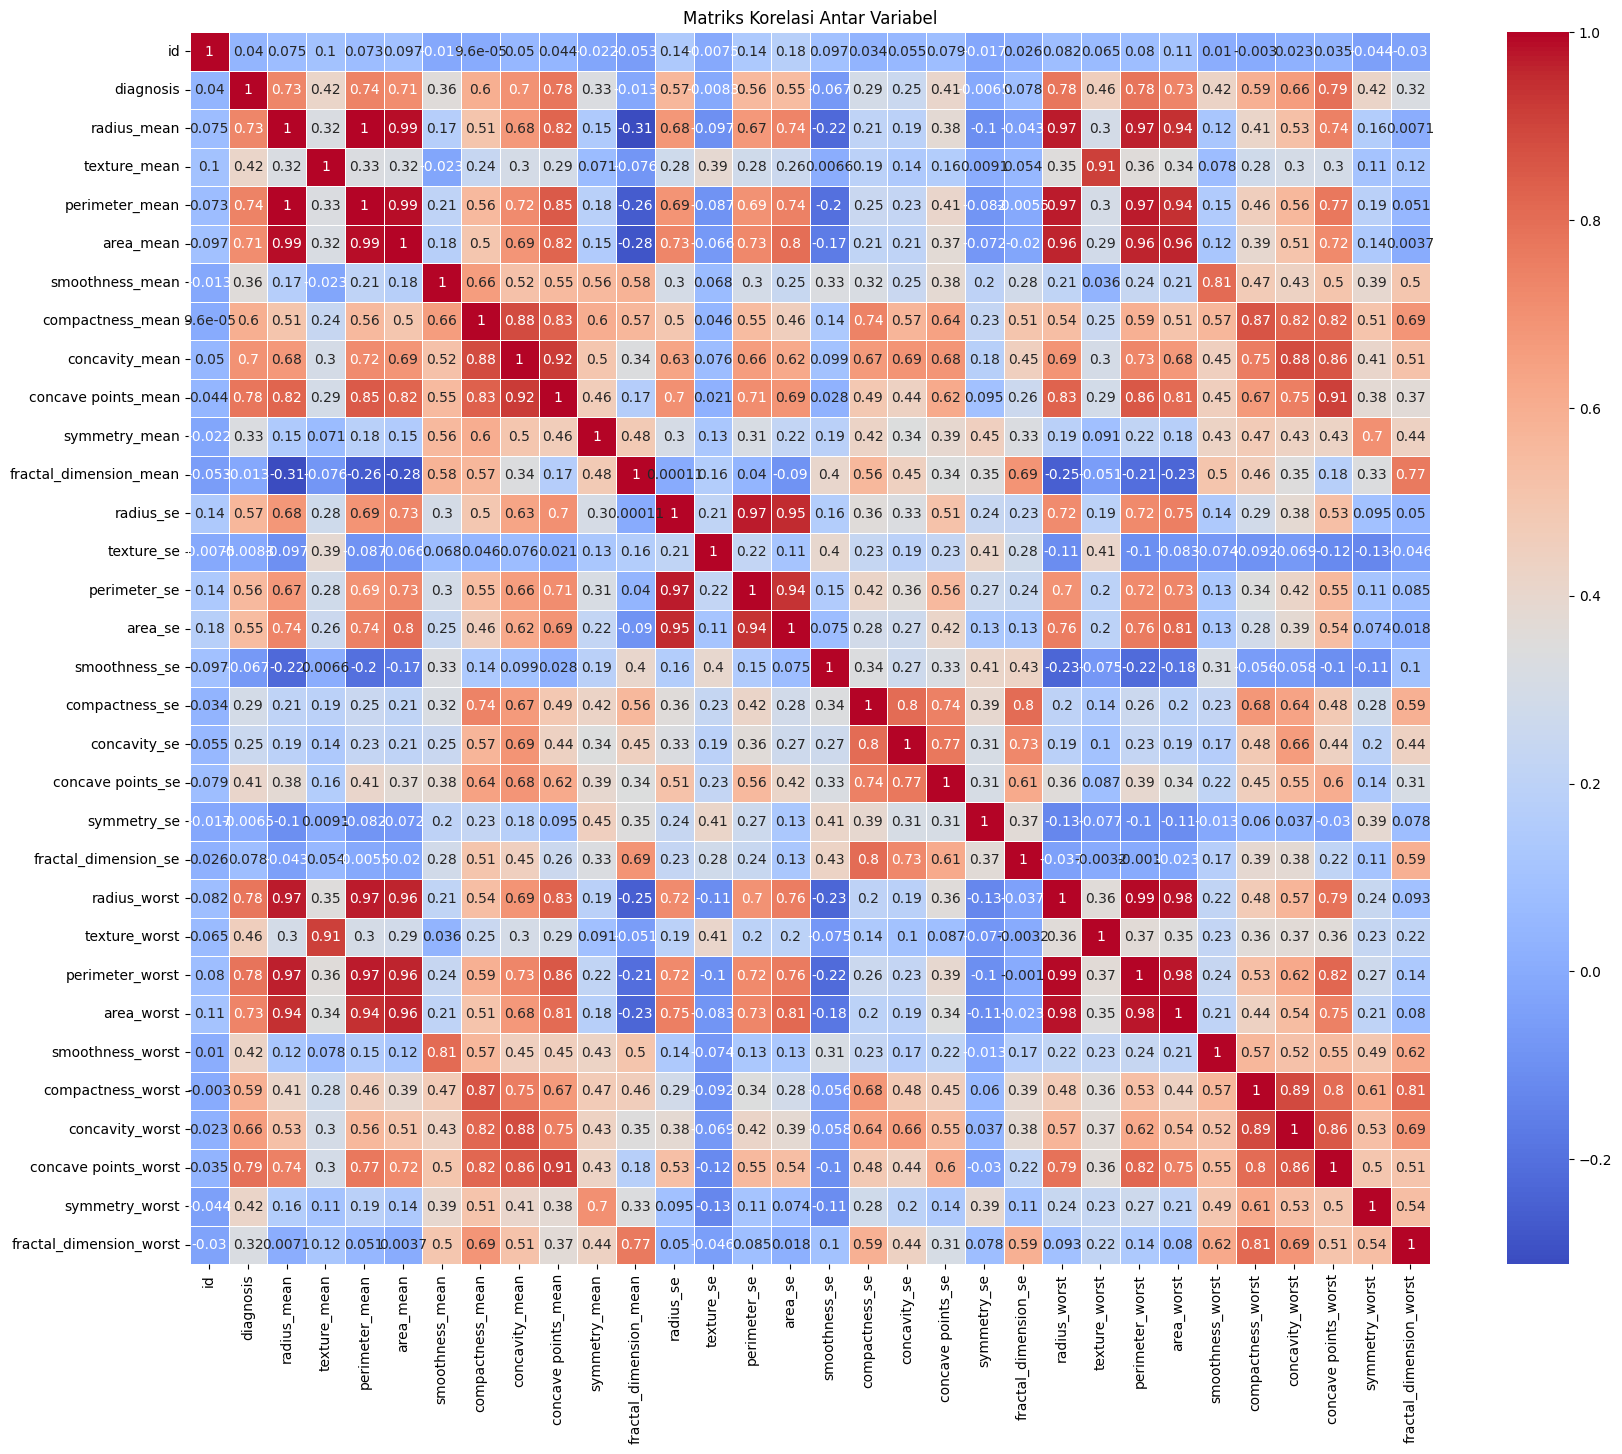

In [51]:

# Menghitung korelasi
corr_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Menambahkan judul
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Heatmap yang ditampilkan di atas menggambarkan hubungan antara berbagai fitur dalam dataset kanker payudara,
# dengan nilai korelasi berkisar antara -1 hingga 1. Korelasi positif yang kuat (mendekati 1) ditandai dengan warna merah tua, sedangkan korelasi negatif yang kuat (mendekati -1) ditandai dengan warna biru tua.

In [52]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']
#membuat variabel untuk menampung kolom dari dataset
#kolom x untuk semua kolom dataset kecuali diagnosis
#kolom y untuk kolom diagnosis

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#Digunakan untuk mengsplit data dengan ukuran 20 persen untuk test dan 80 untuk train

In [54]:
X_train.shape, X_test.shape
#menunjukkan jumlah kolom dan baris

((455, 31), (114, 31))

In [55]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dt_en.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria entropi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [56]:
y_pred_en = dt_en.predict(X_test)
#memprediksi x_test menggunakan kriteria entropi

In [57]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#melihat keakurasian dari pemodelan dengan kriteria entropi

Model accuracy score with criterion entropy: 0.9649


In [58]:
y_train_pred = dt_en.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_en.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.9802
Test accuracy: 0.9649
The model might be overfitting.


[Text(0.5769230769230769, 0.875, 'x[8] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[21] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[14] <= 48.7\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[2] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[23] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[22] <= 25.655\nentropy = 0.994

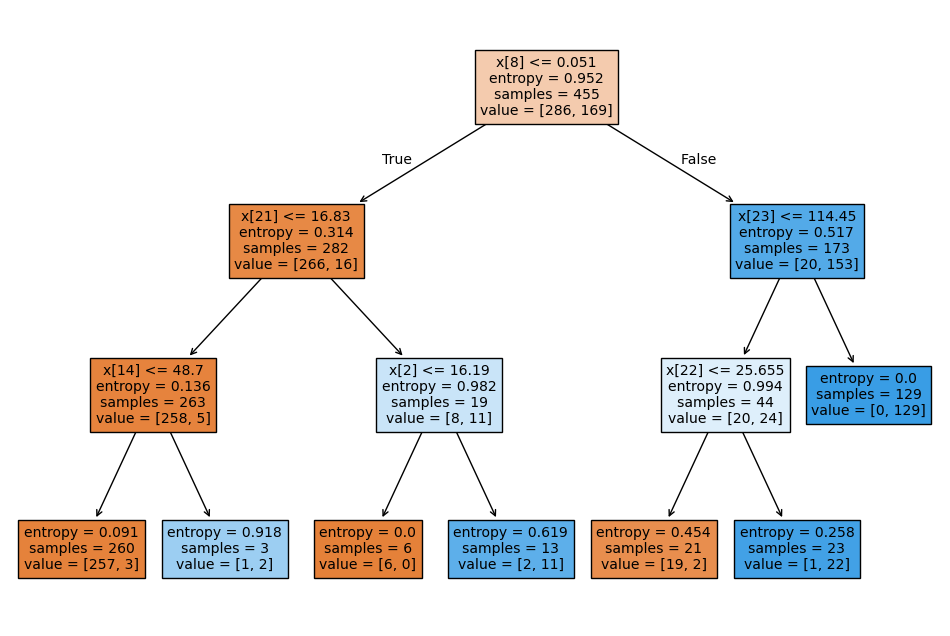

In [59]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria entropi dengan library matplotlib

In [60]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt_gini.fit(X_train, y_train)
#membuat pelatihan pemodelan untuk decision tree yang menggunakan kriteria gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [61]:
y_pred_gini = dt_gini.predict(X_test)
#memprediksi x_test menggunakan kriteria gini

In [62]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#melihat keakurasian dari pemodelan dengan kriteria gini

Model accuracy score with criterion gini: 0.9474


In [63]:
y_train_pred = dt_gini.predict(X_train)

train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = dt_gini.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
#melihat hasil balance pemodelan dan menapilkan akurasi test dan training

Training accuracy: 0.9780
Test accuracy: 0.9474
The model might be overfitting.


[Text(0.5, 0.875, 'x[8] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[21] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[14] <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[2] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[28] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[23] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x[

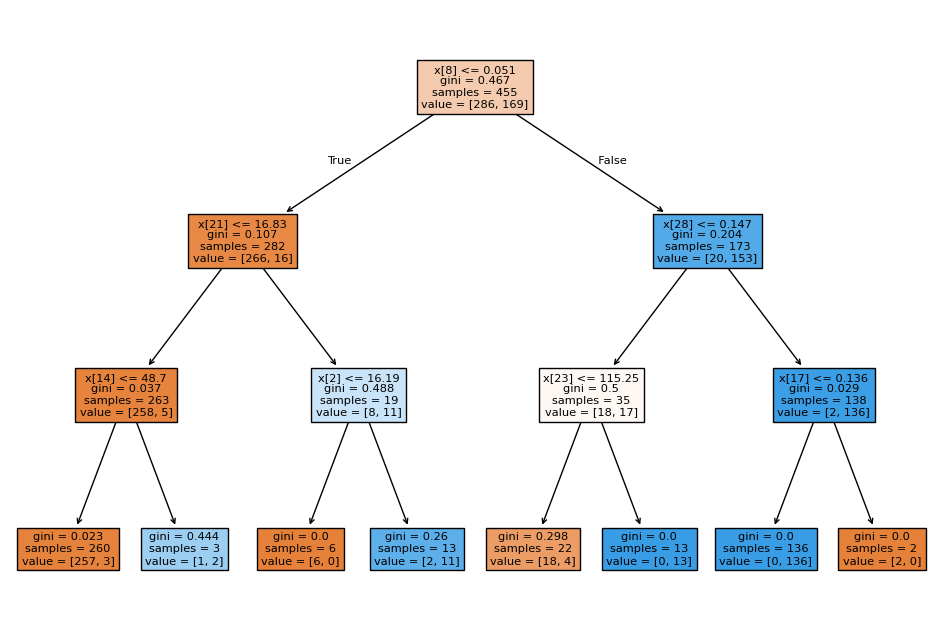

In [64]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)
#membuat decision tree dengan kriteria gini dengan library matplotlib

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix for Entropy-based Tree:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix for Gini-based Tree:\n", cm)

print(classification_report(y_test, y_pred_en))
print(classification_report(y_test, y_pred_gini))
#confusion matrix berdasarkan decision tree kriteria entropi dan gini

Confusion Matrix for Entropy-based Tree:
 [[71  0]
 [ 4 39]]
Confusion Matrix for Gini-based Tree:
 [[69  2]
 [ 4 39]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [66]:
# Skor akurasi model dengan kriteria entropy: 0,96
# Skor akurasi model dengan kriteria gini: 0,95
# keduanya sama-sama akurat tetapi entropy lebih akurat 0.01 saja

In [67]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
# Modelling denga menggunakan Gaussian Bayes Classifier.

GaussianNB()

In [68]:
nb_y_pred = nb_classifier.predict(X_test)
#memprediksi x_test menggunakan kriteria gaussian

In [69]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
#confusion matrix berdasarkan naive bayes

Confusion Matrix for Naive Bayes:
 [[70  1]
 [43  0]]


In [70]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
# print score keakurasiannya

Accuracy Score: 0.6140


In [71]:
print(classification_report(y_test, nb_y_pred))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.62      0.99      0.76        71
           1       0.00      0.00      0.00        43

    accuracy                           0.61       114
   macro avg       0.31      0.49      0.38       114
weighted avg       0.39      0.61      0.47       114



Dari laporan ini, dapat disimpulkan bahwa skor akurasi adalah 0,61 atau 61%. Skor presisi, recall, dan f1 lebih tinggi dibandingkan skor akurasi.

In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan dengan menggunakan logistic regression

LogisticRegression(max_iter=200)

In [73]:
y_pred_log = classifier.predict(X_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat pelatihan untuk memprediksi data x_test dan membuat komparasi untuk menunjukkan tabel aktual dan tabel prediksi

     y_test  y_pred
204       0       0
70        1       1
131       1       1
431       0       0
540       0       0


In [74]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
# print score keakurasiannya

Accuracy Score: 0.9561


In [75]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#confusion matrix

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [76]:
print(classification_report(y_test, y_pred_log))
#print laporan report dari akurasi, precision, recall, f1-score, dsb

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Logistic Regression di sini menunjukkan Skor Akurasi sebesar 0,96, yang berarti lebih dari 90%. Hal ini menunjukkan bahwa model logistic regression cocok untuk mendeteksi kanker payudara.